In [143]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We will use classification algorithms to predict, using the Online shopper behavior dataset, whether Revenue will be 
generated from the following features.  Administrative is the administrative web page, which is used to keep the website 
efficient and secure.  Administrative_Duration is the average time that users spend on the administrative page.  
Informational is the information web page, which has all the general content about the website on it.  
Informational_Duration is the average time that users spend on the information page.  ProductRelated is the product related 
web pages, which displays all of the products to consumers. ProductRelated Duration is the average time consumers spend on 
the product related pages.  BounceRates are the average times that users have left the website homepage without accessing 
any other pages.  ExitRates are the average times that users exited each page.  PageValues are the average times that a page
leads to revenue.  SpecialDay is specific days that may have more tranactions.  Month is each month of the year.  
OperatingSystems are the operating system used by the user.  Browser is the Browser used by the user.  Region is the 
location of the user.  TrafficType is the average amount of people using the website at once.  VisitorType is whether the 
user is a new or reoccurrring visitor.  Weekend is whether revenue occured on the weekend.  Revenue is whether revenue was 
generated.

In [144]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Data Mining

View how many rows and columns in dataframe.

In [82]:
df.shape

(12330, 18)

In [6]:
df.info

<bound method DataFrame.info of        Administrative  Administrative_Duration  Informational  \
0                 0.0                      0.0            0.0   
1                 0.0                      0.0            0.0   
2                 0.0                     -1.0            0.0   
3                 0.0                      0.0            0.0   
4                 0.0                      0.0            0.0   
...               ...                      ...            ...   
12325             3.0                    145.0            0.0   
12326             0.0                      0.0            0.0   
12327             0.0                      0.0            0.0   
12328             4.0                     75.0            0.0   
12329             0.0                      0.0            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0             1.0                 0.000000   
1                         0.0          

View unique values from each column

In [81]:
for column in df:
    print(column,df[column].unique())

Administrative [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
Administrative_Duration [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
Informational [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
Informational_Duration [  0.    -1.   120.   ... 547.75 368.25 211.25]
ProductRelated [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 124. 127

In [5]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Check for null values.  

In [86]:
df.isnull().values.any()

True

Find which columns have null values

In [85]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

# Data Cleaning

Make features that are categorical have a category data type.  

In [145]:
df['Month']=df['Month'].astype('category')
df['VisitorType']=df['VisitorType'].astype('category')
df['Weekend']=df['Weekend'].astype('category')
df['Revenue']=df['Revenue'].astype('category')

Encode categorical features.

In [146]:
df['Month']=df['Month'].cat.codes
df['VisitorType']=df['VisitorType'].cat.codes
df['Weekend']=df['Weekend'].cat.codes
df['Revenue']=df['Revenue'].cat.codes

Make NaN values have the mean value.

In [147]:
df=df.mask(df=='NaN').fillna(df.median())

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Make dataframe have float data type.  

In [148]:
df.astype('float64')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1.0,4.0,6.0,1.0,1.0,2.0,1.0,0.0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7.0,3.0,2.0,1.0,8.0,2.0,1.0,0.0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7.0,3.0,2.0,1.0,13.0,2.0,1.0,0.0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7.0,2.0,2.0,3.0,11.0,2.0,0.0,0.0


# Data Exploration

Let's view the data statistics. 

In [88]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Data is not normally distributed.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AC6EBFA48>,
      dtype=object)

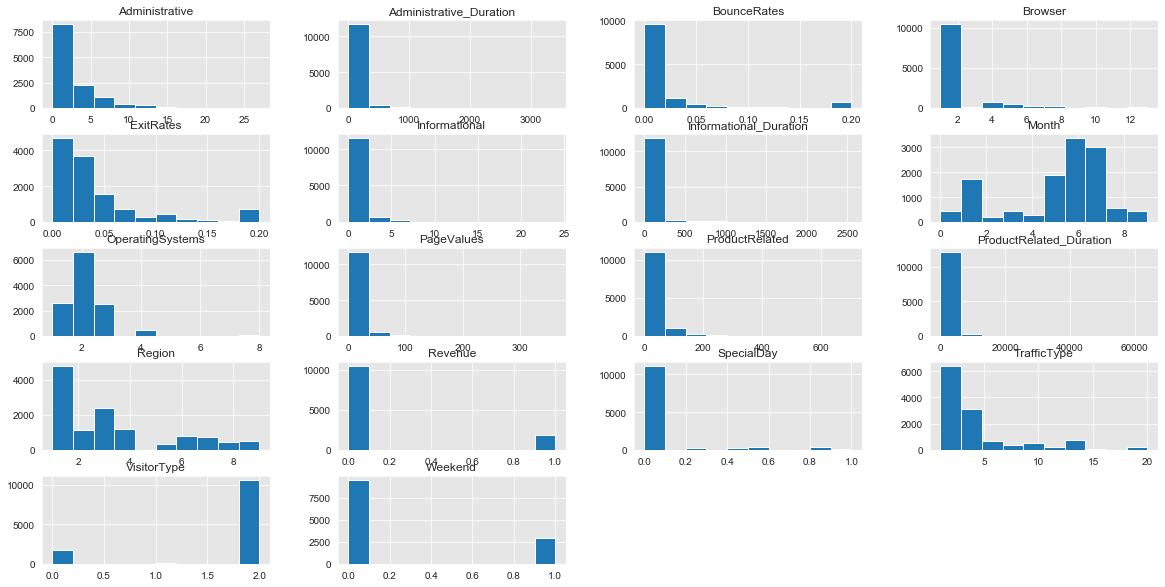

In [265]:
df.hist(figsize=(20,10))

Most of the data has low variance, except product related duration.   

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

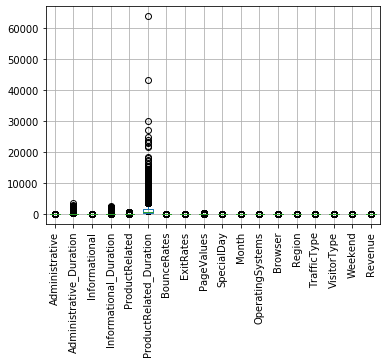

In [70]:
df.boxplot()
plt.xticks(rotation=90)

The correlated features are ProductRelated_Duration with ProductRelated and  BounceRates with ExitRates.  

In [255]:
df.corr() >.7

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Administrative_Duration,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Informational,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Informational_Duration,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ProductRelated,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
ProductRelated_Duration,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
BounceRates,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
ExitRates,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
PageValues,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
SpecialDay,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


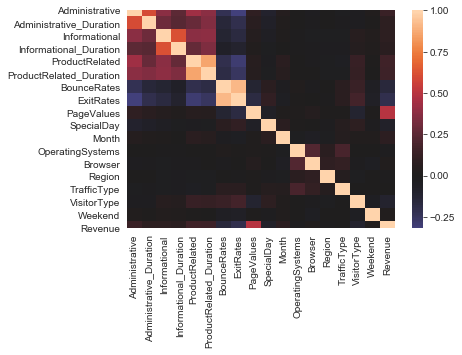

In [257]:
sns.heatmap(df.corr(), center=0);

Revenue occurs as False more often than it does as True.  This is a class imbalance issue. 

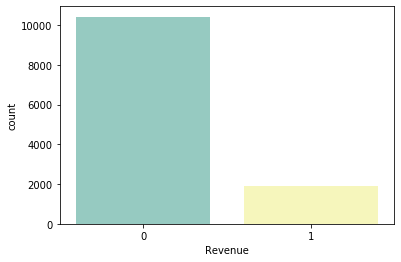

In [73]:
sns.countplot(df['Revenue'], palette='Set3')

Distribusion of each feature toward revenue.  Notice that the PageValue feature mean for True Revenue is larger than the one
for False Revenue.  It is likely that PageValue has a positive effect on Revenue.   

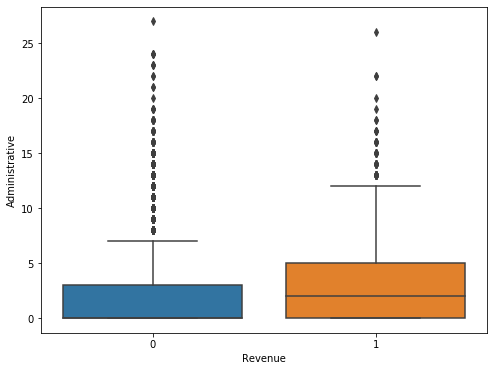

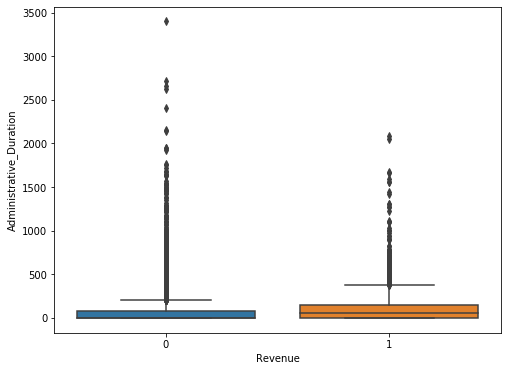

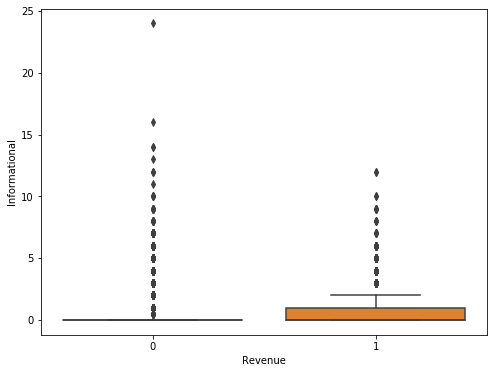

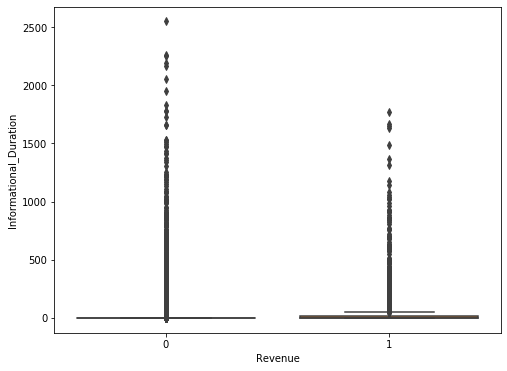

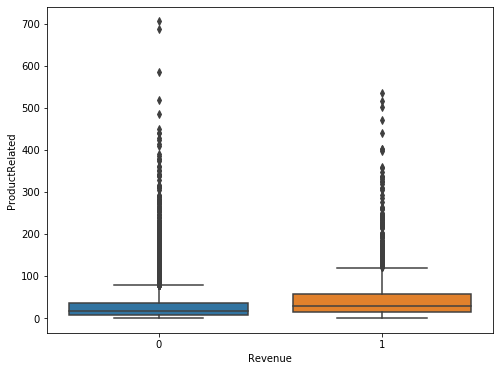

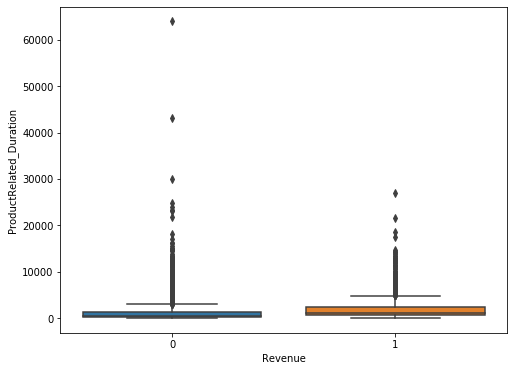

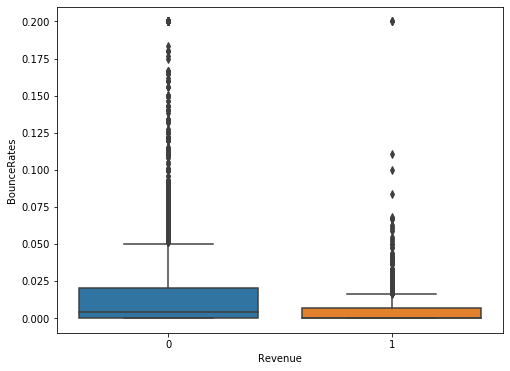

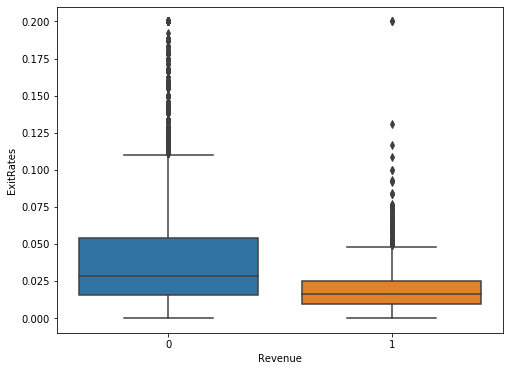

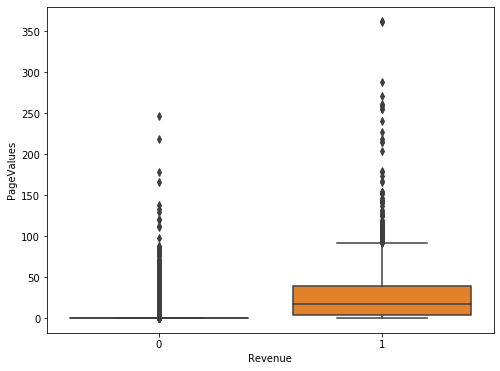

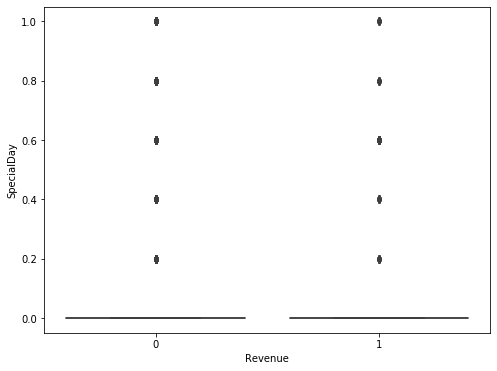

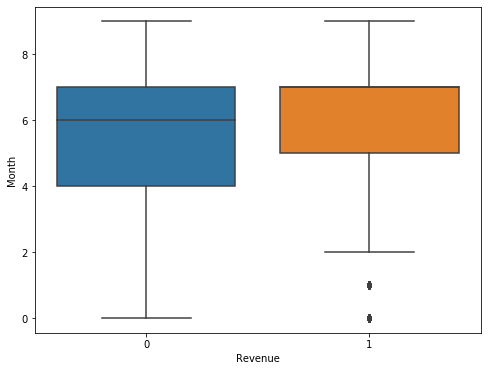

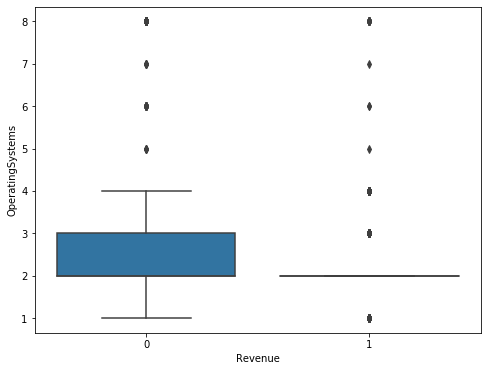

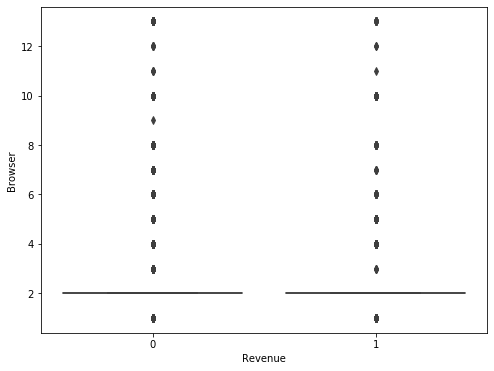

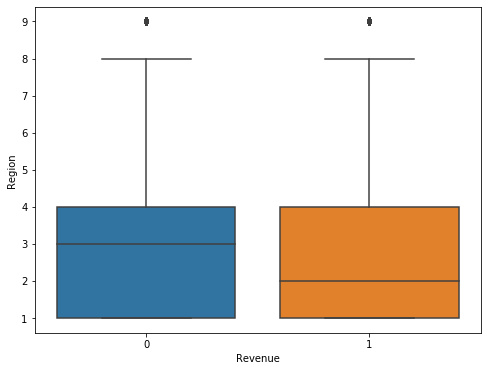

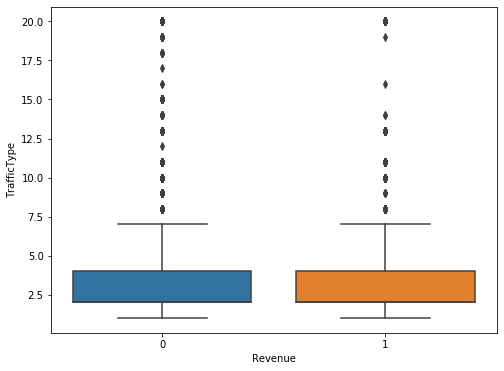

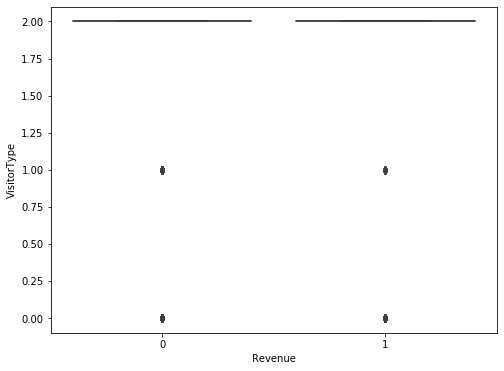

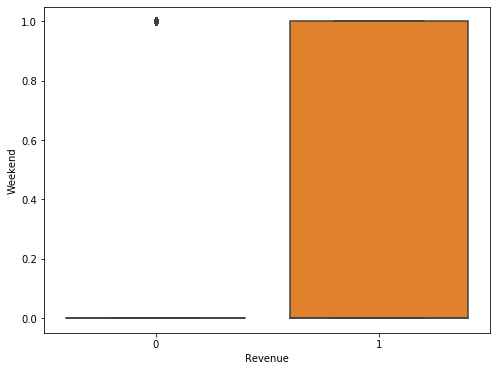

In [74]:
for i in df_columns:
    fig = plt.figure(figsize=(8,6)) 
    sns.boxplot(x=df['Revenue'], y=df[i], data=df)
    plt.show()

# Feature Engineering

Create features and labels

In [149]:
X = df.drop('Revenue', axis=1)  
y = df['Revenue'] 
y = pd.DataFrame(y, columns=['Revenue'])

Perform an 80/20 train test split

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) 

Scale the data

In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_y_train = scaler.fit_transform(y_train)
scaled_X_test = scaler.transform(X_test)
scaled_y_test = scaler.transform(y_test)

In [152]:
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X.columns)
scaled_y_train = pd.DataFrame(scaled_y_train,columns=y.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X.columns)
scaled_y_test = pd.DataFrame(scaled_y_test,columns=y.columns)

Class Imbalance occurs when one class occurs less often than another class, causing the less occurrring class to not be
represented well for prediction.

Redistribute Revenue classes

In [153]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y['Revenue'].value_counts())
smote = SMOTE()
scaled_X_train_resampled, scaled_y_train_resampled = smote.fit_sample(scaled_X_train, scaled_y_train) 
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(scaled_y_train_resampled['Revenue'].value_counts()) 

Original class distribution: 

0    10422
1     1908
Name: Revenue, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1.0    8333
0.0    8333
Name: Revenue, dtype: int64


# Predictive Modeling

Logistic Regression uses a sigmoid function to classify binary data.  We will use Logistic Regression to classify whether it
is likely that revenue resulted from the dataframe features.   

Initiate and fit the logistic regression model.  

In [113]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression()


logistic_regression.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [155]:
import joblib

joblib.dump(logistic_regression, "lr.pkl")

['lr.pkl']

In [156]:
load_lr = joblib.load("lr.pkl")
load_lr

LogisticRegression()

Generate predictions from the normalized data.  

In [114]:
y_hat_train_lr = logistic_regression.predict(scaled_X_train_resampled)

Conduct cross validation.

In [123]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(logistic_regression, scaled_X_train, scaled_y_train, cv=5)
mean_lr_cv_score = np.mean(lr_cv_score)

print(f"Mean Cross Validation Score: {mean_lr_cv_score :.2%}")

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Mean Cross Validation Score: 87.54%


The features that are important to predicting revenue are the ones that have a positive importance score.  A score of 0 
means a feature has no effect on revenue and a negative score means that the feature has an inverse effect on revenue.  

PageValue has the largest positive effect on Revenue.  Administrative, Informational, ProductRelated, 
ProductRelated_Duration, BounceRates, Month, Browser, and Weekend had a small possitive effect on Revenue.    Administrative_Duration, Informational_Duration, ExitRatess, SpecialDay, Region, TrafficType, and VisitorType had a small negative effect on Revenue.  

In [116]:
X = df.drop('Revenue', axis=1)
df_columns=[]
for i in X.columns:
    df_columns.append(i)

importance_lr = logistic_regression.coef_[0]

for i,c in zip(importance_lr,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.3816271236935376
Feature: Administrative_Duration, Score: -1.0379560353231074
Feature: Informational, Score: 0.9428186632875459
Feature: Informational_Duration, Score: 0.04505133830172083
Feature: ProductRelated, Score: 3.0759872580094236
Feature: ProductRelated_Duration, Score: 2.7367695007995043
Feature: BounceRates, Score: 0.04940941639289655
Feature: ExitRates, Score: -3.666718219969977
Feature: PageValues, Score: 29.945478877819834
Feature: SpecialDay, Score: -1.273184255465908
Feature: Month, Score: 1.0012408478979458
Feature: OperatingSystems, Score: -0.3189668696566874
Feature: Browser, Score: 0.15845465044546528
Feature: Region, Score: -0.12080207184162144
Feature: TrafficType, Score: -0.1577946771495955
Feature: VisitorType, Score: -0.2225002527325203
Feature: Weekend, Score: 0.006151775170816556


<BarContainer object of 17 artists>

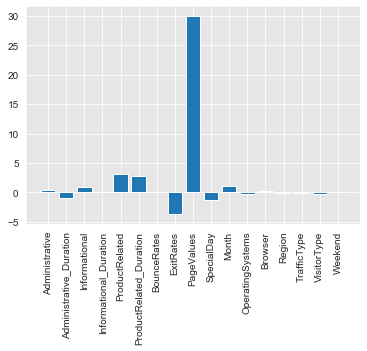

In [117]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_lr)

The metrics that we will use to measure the model are precision, recall, accuracy, recall.  Precision is the percentage of 
true positive classifications from all positive classifications. Recall is the percentage of true positive classifications 
from all true classifications. Accuracy is the pecentage of true classifications from all classifications. f1 score is the 
harmonic mean of precision and recall.  Validate with the train and test split. 

In [84]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def Metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true positives and more true negatives at the expense of more false negatives. The Accuracy indicates that the model classified true values well. The f1 Score, weighted average between percision and recall, indicates that percision and recall are harmonic.

In [118]:
Metrics(scaled_y_train_resampled,y_hat_train_lr)

Precision Score: 0.8784112402053499
Recall Score: 0.780271210848434
Accuracy Score: 0.8361334453378135
F1 Score: 0.8264378773435017


The model correctly classified 7433 observations as false, true negatives, and 6602 observations as true, true positives, 
and misclassified 900 observations as true, false positives, and 1831 observations as false, false negatives.  

In [183]:
from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_lr))
cm


Confusion Matrix
----------------


,0,1
0,7433,900
1,1831,6502


ROC curve measures the true positive rate per false positive rate.  

The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [120]:
from sklearn.metrics import roc_curve, auc

false_positive_train_rate_lr, true_positive_train_rate_lr, thresholds = roc_curve(scaled_y_train_resampled,y_hat_train_lr)
roc_auc = auc(false_positive_train_rate_lr, true_positive_train_rate_lr)

AUC: 0.8361334453378135


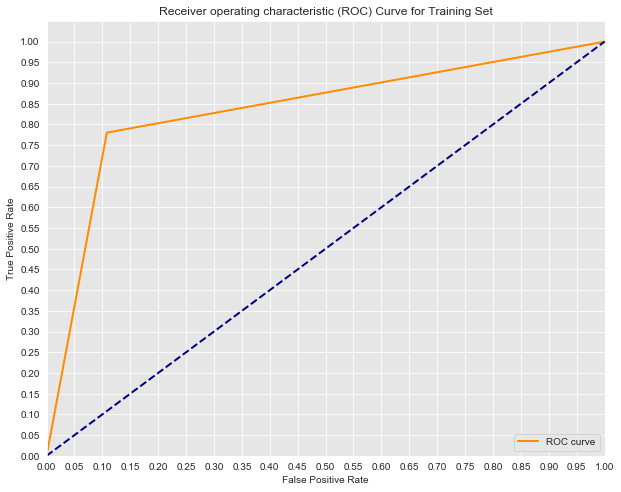

In [121]:
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
plt.show()

Perform a grid search to determine whether parameters can be improved. 

In [93]:
logistic_regression.get_params()

{'C': 1000000000000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Make a grid to hold hyper-parameters.

In [185]:
lr_grid = {'C': [1, 10, 100, 1000000000000.0],
 'class_weight': [None, 1, 10],
 'dual': [True, False],
 'fit_intercept': [True, False],
 'intercept_scaling': [1, 10, 100],
 'l1_ratio': [None, 1, 10],
 'max_iter': [1, 10, 100],
 'n_jobs': [None, 1, 10],
 'penalty': ['l1', 'l2'],
 'random_state': [None, 1, 10],
 'tol': [0.0001, 1, 10],
 'verbose': [0, 1, 10]
          }

Conduct random search.

In [186]:
from sklearn.model_selection import RandomizedSearchCV

lr_rand_search=RandomizedSearchCV(logistic_regression,lr_grid,cv=5)
lr_rand_search.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 100, 1000000000000.0],
                                        'class_weight': [None, 1, 10],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1, 10, 100],
                                        'l1_ratio': [None, 1, 10],
                                        'max_iter': [1, 10, 100],
                                        'n_jobs': [None, 1, 10],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [None, 1, 10],
                                        'tol': [0.0001, 1, 10],
                                        'verbose': [0, 1, 10]})

Display random search optimal parameters.

In [187]:
print(f"Optimal Hyper-Parameters: {lr_rand_search.best_params_}")

Optimal Hyper-Parameters: {'verbose': 0, 'tol': 1, 'random_state': 1, 'penalty': 'l2', 'n_jobs': 10, 'max_iter': 100, 'l1_ratio': 10, 'intercept_scaling': 100, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 1}


Make new model with adjusted hyper-parameters.  

In [104]:
logistic_regression_parameter_adjusted=LogisticRegression(verbose= 1, tol= 10, random_state= 1, penalty= 'l2', 
                                                          n_jobs= 1, max_iter= 10, l1_ratio= 1, 
                                                          intercept_scaling= 10, fit_intercept= False, dual= False, 
                                                          class_weight= None, C= 100)
logistic_regression_parameter_adjusted.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

LogisticRegression(C=100, fit_intercept=False, intercept_scaling=10, l1_ratio=1,
                   max_iter=10, n_jobs=1, random_state=1, tol=10, verbose=1)

Generate predictions.

In [105]:
y_hat_train_parameter_adjusted_lr = logistic_regression_parameter_adjusted.predict(scaled_X_train_resampled)

The feature that positively affects Revenue the most is PageValues. Informational, ProductRelated, ProductRelated_Duration, 
and Month had a small positive affect on Revenue.  ExitRates, SpeciaDay, OperatingSystems, Region, and VisitorType had a small negative 
affect on Revenue.  Administrative, Administrative_Duration, Informational_Duration, BounceRates, Browser, 
TrafficType, and Weekend had no effect on Revenue.

In [106]:
importance_lr_parameter_adjusted = logistic_regression_parameter_adjusted.coef_[0]
for i,c in zip(importance_lr_parameter_adjusted,df_columns):
    print(f'Feature: {c}, Score: {i}')

Feature: Administrative, Score: -0.4196969845311328
Feature: Administrative_Duration, Score: -0.5852878456956601
Feature: Informational, Score: 0.8154264171242701
Feature: Informational_Duration, Score: 0.43500136169792847
Feature: ProductRelated, Score: 2.7307808787687744
Feature: ProductRelated_Duration, Score: 1.537418709008826
Feature: BounceRates, Score: -4.1513888593921155
Feature: ExitRates, Score: -8.38884376379677
Feature: PageValues, Score: 18.2687458527473
Feature: SpecialDay, Score: -0.9050578639349306
Feature: Month, Score: 0.6101872351725295
Feature: OperatingSystems, Score: -0.5832716182146089
Feature: Browser, Score: 0.576009658955844
Feature: Region, Score: 0.06815282598394119
Feature: TrafficType, Score: 0.09049210473562765
Feature: VisitorType, Score: 0.06125080458852429
Feature: Weekend, Score: 0.3332136309026284


<BarContainer object of 17 artists>

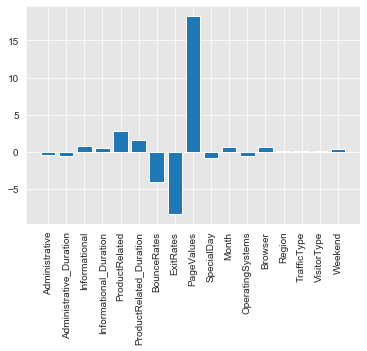

In [107]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_lr_parameter_adjusted)

Recall is higher than Precision, indicating that the model classified fewer false negatives at the expense of fewer true 
negatives and more true positives at the expense of more  false positives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [108]:
Metrics(scaled_y_train_resampled,y_hat_train_parameter_adjusted_lr)

Precision Score: 0.7674527200560355
Recall Score: 0.7889115564622585
Accuracy Score: 0.7749309972398896
F1 Score: 0.7780342032072904


The model correctly classified 6341 observations as false and 6574 observations as true, and misclassified 1992 observations 
as true and 1759 observations as false.  

In [137]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_parameter_adjusted_lr))
cm


Confusion Matrix
----------------


,0,1
0,6341,1992
1,1759,6574


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [110]:
false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, thresholds = roc_curve(scaled_y_train_resampled, y_hat_train_parameter_adjusted_lr)
roc_auc = auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)

AUC: 0.7749309972398897


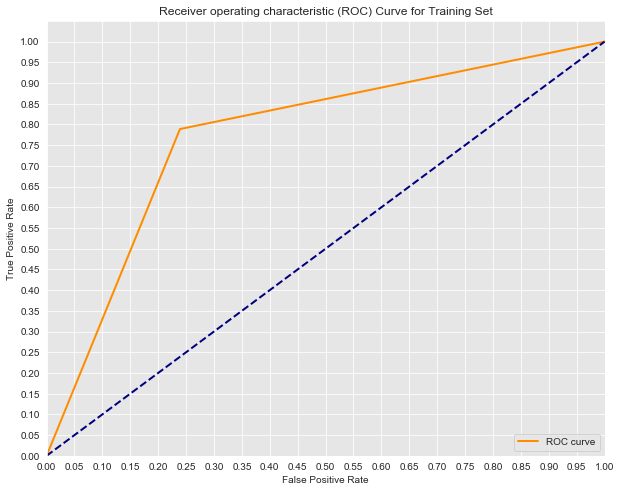

In [111]:
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)))
plt.show()

ROC model comparison shows that model without adjusted parameters performs better.  

Resampled
Logistic Regression AUC: 0.8361334453378135
Logistic Regression Parameter Adjusted AUC: 0.7749309972398897


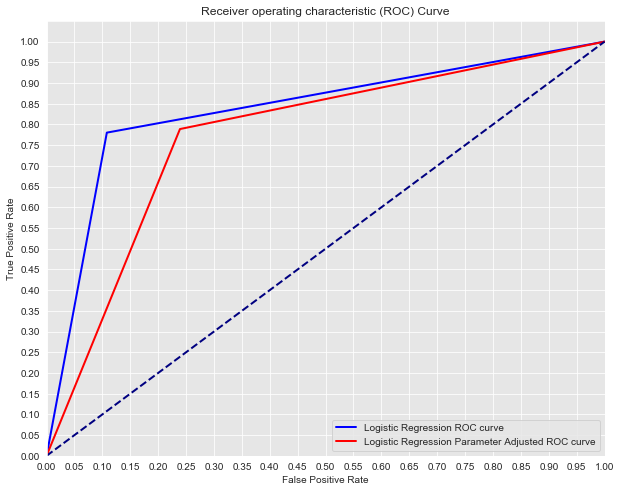

In [122]:
print('Resampled')
print('Logistic Regression AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
print('Logistic Regression Parameter Adjusted AUC: {}'.format(auc(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr)))



sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='blue',
         lw=lw, label='Logistic Regression ROC curve')
plt.plot(false_positive_train_rate_parameter_adjusted_lr, true_positive_train_rate_parameter_adjusted_lr, color='red',
         lw=lw, label='Logistic Regression Parameter Adjusted ROC curve')



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree classification uses node decition splits to parce data with high entropy to achieve maximum information 
gain.   

Initiate and fit the Decision Tree model.

In [157]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()  

decision_tree.fit(scaled_X_train_resampled, scaled_y_train_resampled) 

DecisionTreeClassifier()

In [246]:
joblib.dump(decision_tree, "dt.pkl")

['dt.pkl']

In [248]:
load_dt = joblib.load("dt.pkl")
load_dt

DecisionTreeClassifier()

Generate predictions.

In [158]:
y_hat_train_dt = decision_tree.predict(scaled_X_train_resampled)

Perform cross Validation.


In [159]:
dt_cv_score = cross_val_score(decision_tree, scaled_X_train_resampled, scaled_y_train_resampled, cv=5)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 89.85%


All features have a positive effect on Revenue.  PageValues has the largest effect on Revenue.  

In [160]:
importance_dt = decision_tree.feature_importances_

for i,c in zip(importance_dt,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.03788782253622806
Feature: Administrative_Duration, Score: 0.022669882709364254
Feature: Informational, Score: 0.01653420470407128
Feature: Informational_Duration, Score: 0.011371424932577175
Feature: ProductRelated, Score: 0.03940674275088205
Feature: ProductRelated_Duration, Score: 0.03026642695749756
Feature: BounceRates, Score: 0.02601073711230899
Feature: ExitRates, Score: 0.037205394924939274
Feature: PageValues, Score: 0.6591862189175457
Feature: SpecialDay, Score: 0.002268524516514592
Feature: Month, Score: 0.03962100180742824
Feature: OperatingSystems, Score: 0.008936893437310156
Feature: Browser, Score: 0.01062576756081806
Feature: Region, Score: 0.018783480852952224
Feature: TrafficType, Score: 0.030213627618009355
Feature: VisitorType, Score: 0.0038144953383574074
Feature: Weekend, Score: 0.005197353323195568


<BarContainer object of 17 artists>

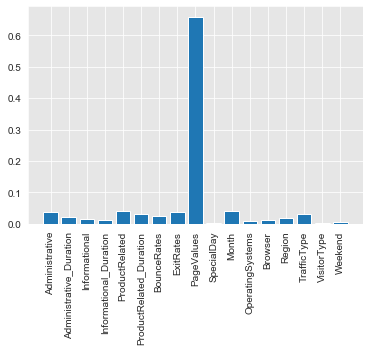

In [161]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_dt)

The model classifies all instances corectly. 

In [277]:
Metrics(scaled_y_train_resampled,y_hat_train_dt)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [167]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_dt))
cm


Confusion Matrix
----------------


,0,1
0,8333,0
1,0,8333


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [164]:
false_positive_train_rate_dt, true_positive_train_rate_dt, thresholds = roc_curve(scaled_y_train_resampled, y_hat_train_dt)
roc_auc = auc(false_positive_train_rate_dt, true_positive_train_rate_dt)

AUC: 1.0


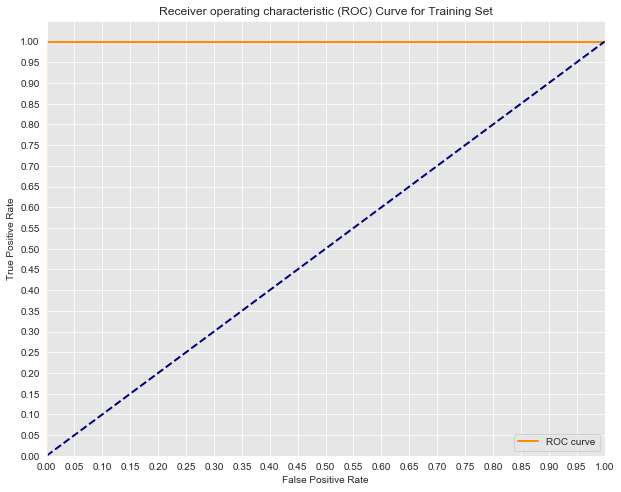

In [165]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_dt, true_positive_train_rate_dt, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_dt, true_positive_train_rate_dt)))
plt.show()

Random Forest classification has multiple trees that together lower model variance and considers subsets of features that 
are then compared and the optimal subset utilizes the training data for classification.  

Initiate and fit the Decision Tree model.

In [199]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

In [249]:
joblib.dump(random_forest, "rf.pkl")

['rf.pkl']

In [250]:
load_rf = joblib.load("rf.pkl")
load_rf

RandomForestClassifier()

Generate predictions.

In [200]:
y_hat_train_rf = random_forest.predict(scaled_X_train_resampled)

Perform Cross Validation.  

In [201]:
rf_cv_score = cross_val_score(random_forest, scaled_X_train_resampled, scaled_y_train_resampled, cv=5)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vec

Mean Cross Validation Score: 93.47%


All features have a positive effect on Revenue.  PageValues has the largest effect on Revenue.  

In [202]:
importance_rf = random_forest.feature_importances_

for i,c in zip(importance_rf,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.06288895214092474
Feature: Administrative_Duration, Score: 0.04026176092030547
Feature: Informational, Score: 0.025044159479364496
Feature: Informational_Duration, Score: 0.014614248424363393
Feature: ProductRelated, Score: 0.053791104502452884
Feature: ProductRelated_Duration, Score: 0.0708849498161447
Feature: BounceRates, Score: 0.03739730231034547
Feature: ExitRates, Score: 0.06011399794452985
Feature: PageValues, Score: 0.4870857515374125
Feature: SpecialDay, Score: 0.002964423403190103
Feature: Month, Score: 0.048207345016592205
Feature: OperatingSystems, Score: 0.015253058070690153
Feature: Browser, Score: 0.014137642246149836
Feature: Region, Score: 0.02027593176947883
Feature: TrafficType, Score: 0.03376025778291899
Feature: VisitorType, Score: 0.007486007152787801
Feature: Weekend, Score: 0.005833107482348607


<BarContainer object of 17 artists>

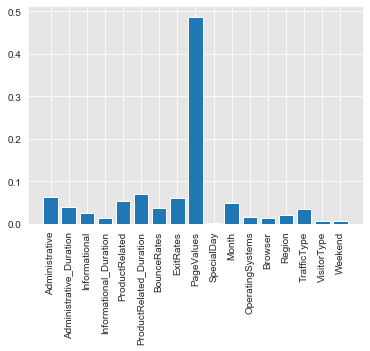

In [203]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_rf)

Precision is higher than Recall, indicating that the model classified fewer false positives at the expense of fewer true 
positives and more true negatives at the expense of more false negatives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [205]:
Metrics(scaled_y_train_resampled,y_hat_train_rf)

Precision Score: 1.0
Recall Score: 0.999879995199808
Accuracy Score: 0.999939997599904
F1 Score: 0.9999399939994


The model correctly classified 8333 observations as false, true negatives, and 8332 observations as true, true positives, 
and misclassified 0 observations as true, false positives, and 1 observation as false, false negatives.  

In [207]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_rf))
cm


Confusion Matrix
----------------


,0,1
0,8333,0
1,1,8332


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [208]:
false_positive_train_rate_rf, true_positive_train_rate_rf, thresholds = roc_curve(scaled_y_train_resampled,y_hat_train_rf)
roc_auc = auc(false_positive_train_rate_rf, true_positive_train_rate_rf)

AUC: 0.9999399975999039


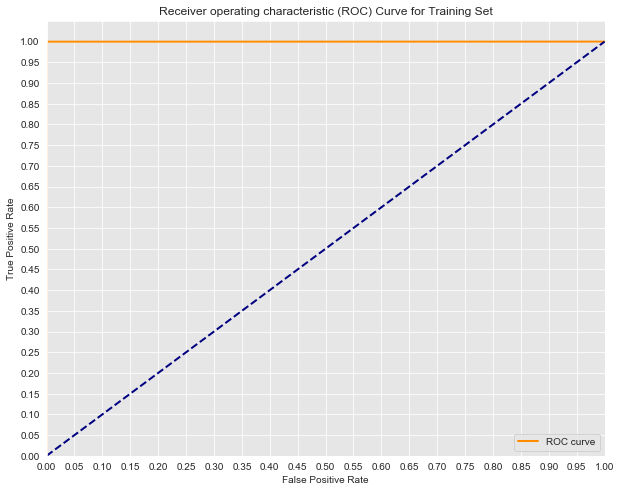

In [209]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_rf, true_positive_train_rate_rf, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_rf, true_positive_train_rate_rf)))
plt.show()

Gradient Boost classification utilizes trees that build upon nodes according to which node has the minimum prediction error.  

Initiate and fit the Gradient Boost model.

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [252]:
joblib.dump(gradient_boost, "gb.pkl")

['gb.pkl']

In [253]:
load_gb = joblib.load("gb.pkl")
load_gb

GradientBoostingClassifier()

Gradient Boosting model predictions.  

In [211]:
y_hat_train_gb = gradient_boost.predict(scaled_X_train_resampled)

Perform cross validation.  

In [213]:
gb_cv_score = cross_val_score(gradient_boost, scaled_X_train_resampled, scaled_y_train_resampled, cv=5)
mean_gb_cv_score = np.mean(gb_cv_score)

print(f"Mean Cross Validation Score: {mean_gb_cv_score :.2%}")

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Mean Cross Validation Score: 91.76%


All features have a positive effect on Revenue except Special Day, which has no effect on Revenue.  PageValues has the largest effect on Revenue.  

In [214]:
importance_gb = gradient_boost.feature_importances_

for i,c in zip(importance_gb,df_columns):
    print(f'Feature: {c} Score: {i}')

Feature: Administrative Score: 0.023288101972923428
Feature: Administrative_Duration Score: 0.0027151576764618468
Feature: Informational Score: 0.0300260661665333
Feature: Informational_Duration Score: 0.0010023012856987237
Feature: ProductRelated Score: 0.00957995189935374
Feature: ProductRelated_Duration Score: 0.005006989280537325
Feature: BounceRates Score: 0.004543645471584453
Feature: ExitRates Score: 0.004866341878626545
Feature: PageValues Score: 0.8324934482836378
Feature: SpecialDay Score: 0.0
Feature: Month Score: 0.049989409065701734
Feature: OperatingSystems Score: 0.008051312948138248
Feature: Browser Score: 0.0033060324777216534
Feature: Region Score: 0.0023820993998823355
Feature: TrafficType Score: 0.019876781727737387
Feature: VisitorType Score: 0.002872360465461601
Feature: Weekend Score: 0.0


<BarContainer object of 17 artists>

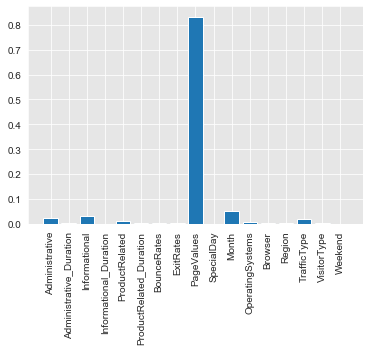

In [215]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_gb)

Recall is higher than Precision, indicating that the model classified fewer false negatives at the expense of fewer true 
negatives and more true positives at the expense of more  false positives.  The Accuracy indicates that the model classified 
true values well.  The f1 Score, weighted average between percision and recall, indicates that percision and recall are 
harmonic.

In [216]:
Metrics(scaled_y_train_resampled,y_hat_train_gb)

Precision Score: 0.9274605247536507
Recall Score: 0.937477499099964
Accuracy Score: 0.9320772830913236
F1 Score: 0.9324421102888518


The model correctly classified 7722 observations as false, true negatives, and 7812 observations as true, true positives, 
and misclassified 521 observations as true, false positives, and 521 observations as false, false negatives.  

In [217]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_gb))
cm


Confusion Matrix
----------------


,0,1
0,7722,611
1,521,7812


The ROC curve indicates that the model has a larger true positive rate than false positive rate.

In [218]:
false_positive_train_rate_gb, true_positive_train_rate_gb, thresholds = roc_curve(scaled_y_train_resampled,y_hat_train_gb)
roc_auc = auc(false_positive_train_rate_gb, true_positive_train_rate_gb)

AUC: 0.9320772830913236


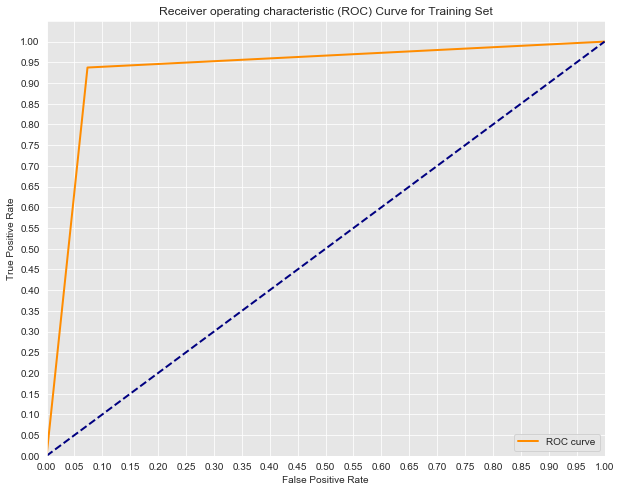

In [219]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_gb, true_positive_train_rate_gb, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_gb, true_positive_train_rate_gb)))
plt.show()

Voting Classifier is an ensemble of the previous algorithms used.

In [224]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('lr', logistic_regression),('dt', decision_tree),('rf', random_forest),
                                      ('gb', gradient_boost)], voting='hard')

voting.fit(scaled_X_train_resampled, scaled_y_train_resampled)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())])

In [254]:
joblib.dump(voting, "vt.pkl")

['vt.pkl']

In [255]:
load_vt = joblib.load("vt.pkl")
load_vt

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())])

In [225]:
y_hat_train_vt = voting.predict(scaled_X_train_resampled)

In [226]:
vt_cv_score = cross_val_score(voting, scaled_X_train_resampled, scaled_y_train_resampled, cv=5)
mean_vt_cv_score = np.mean(vt_cv_score)

print(f"Mean Cross Validation Score: {mean_vt_cv_score :.2%}")

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Mean Cross Validation Score: 91.89%


In [229]:
Metrics(scaled_y_train_resampled,y_hat_train_vt)

Precision Score: 1.0
Recall Score: 0.9491179647185888
Accuracy Score: 0.9745589823592944
F1 Score: 0.9738948405368797


In [230]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_train_resampled, y_hat_train_vt))
cm


Confusion Matrix
----------------


,0,1
0,8333,0
1,424,7909


In [231]:
false_positive_train_rate_vt, true_positive_train_rate_vt, thresholds = roc_curve(scaled_y_train_resampled,y_hat_train_vt)
roc_auc = auc(false_positive_train_rate_vt, true_positive_train_rate_vt)

AUC: 0.9745589823592944


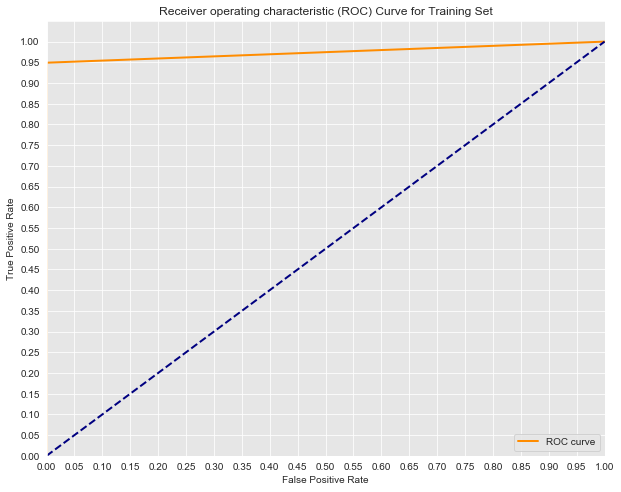

In [232]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_train_rate_vt, true_positive_train_rate_vt, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_train_rate_vt, true_positive_train_rate_vt)))
plt.show()

ROC model comaprison 

Logistic Regression AUC: 0.8361334453378135
Decision Tree AUC: 1.0
Random Forest AUC: 0.9999399975999039
Gradient Boost AUC: 0.9320772830913236
Voting AUC: 0.9745589823592944


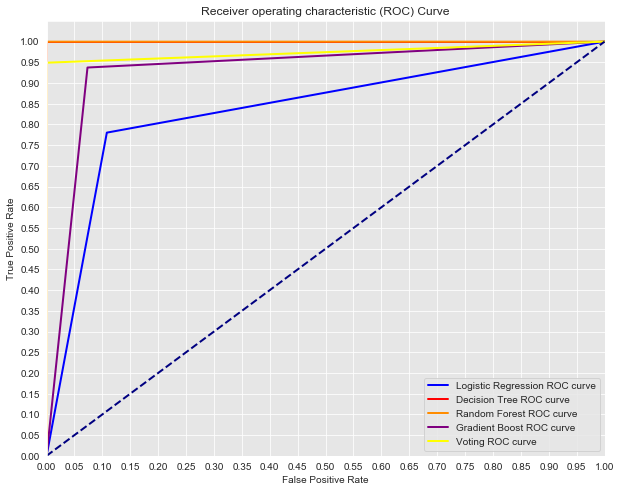

In [276]:
print('Logistic Regression AUC: {}'.format(auc(false_positive_train_rate_lr, true_positive_train_rate_lr)))
print('Decision Tree AUC: {}'.format(auc(false_positive_train_rate_dt, true_positive_train_rate_dt)))
print('Random Forest AUC: {}'.format(auc(false_positive_train_rate_rf, true_positive_train_rate_rf)))
print('Gradient Boost AUC: {}'.format(auc(false_positive_train_rate_gb, true_positive_train_rate_gb)))
print('Voting AUC: {}'.format(auc(false_positive_train_rate_vt, true_positive_train_rate_vt)))

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(false_positive_train_rate_lr, true_positive_train_rate_lr, color='blue',
         lw=lw, label='Logistic Regression ROC curve')
plt.plot(false_positive_train_rate_dt, true_positive_train_rate_dt, color='red',
         lw=lw, label='Decision Tree ROC curve')
plt.plot(false_positive_train_rate_rf, true_positive_train_rate_rf, color='darkorange',
         lw=lw, label='Random Forest ROC curve')
plt.plot(false_positive_train_rate_gb, true_positive_train_rate_gb, color='purple',
         lw=lw, label='Gradient Boost ROC curve')
plt.plot(false_positive_train_rate_vt, true_positive_train_rate_vt, color='yellow',
         lw=lw, label='Voting ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC.png')
plt.show()

Test the decision tree model on the test set

In [238]:
decision_tree = DecisionTreeClassifier()  

decision_tree.fit(scaled_X_test, scaled_y_test) 

DecisionTreeClassifier()

In [239]:
y_hat_test_dt = decision_tree.predict(scaled_X_test)

In [240]:
importance_dt = decision_tree.feature_importances_

for i,c in zip(importance_dt,df_columns):
    print(f'Feature: {c}, Score: {i}') 

Feature: Administrative, Score: 0.0520404526824111
Feature: Administrative_Duration, Score: 0.08285725466418213
Feature: Informational, Score: 0.01560762721041052
Feature: Informational_Duration, Score: 0.025143511855870947
Feature: ProductRelated, Score: 0.06736250514215975
Feature: ProductRelated_Duration, Score: 0.08003288867324754
Feature: BounceRates, Score: 0.06777664243228992
Feature: ExitRates, Score: 0.04482708786622511
Feature: PageValues, Score: 0.4019135280207626
Feature: SpecialDay, Score: 0.0
Feature: Month, Score: 0.035430415301329815
Feature: OperatingSystems, Score: 0.020779366642570282
Feature: Browser, Score: 0.014308750150382177
Feature: Region, Score: 0.03798758367636123
Feature: TrafficType, Score: 0.03874964538618017
Feature: VisitorType, Score: 0.008863801445634034
Feature: Weekend, Score: 0.00631893884998254


<BarContainer object of 17 artists>

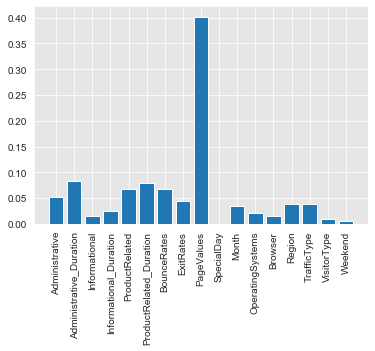

In [241]:
plt.xticks(rotation=90)
plt.bar(df_columns,importance_dt)

In [242]:
Metrics(scaled_y_test,y_hat_test_dt)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [243]:
print('\nConfusion Matrix')
print('----------------')
cm=pd.DataFrame(confusion_matrix(scaled_y_test, y_hat_test_dt))
cm


Confusion Matrix
----------------


,0,1
0,2089,0
1,0,377


In [244]:
false_positive_test_rate_dt, true_positive_test_rate_dt, thresholds = roc_curve(scaled_y_test,y_hat_test_dt)
roc_auc = auc(false_positive_test_rate_dt, true_positive_test_rate_dt)

AUC: 1.0


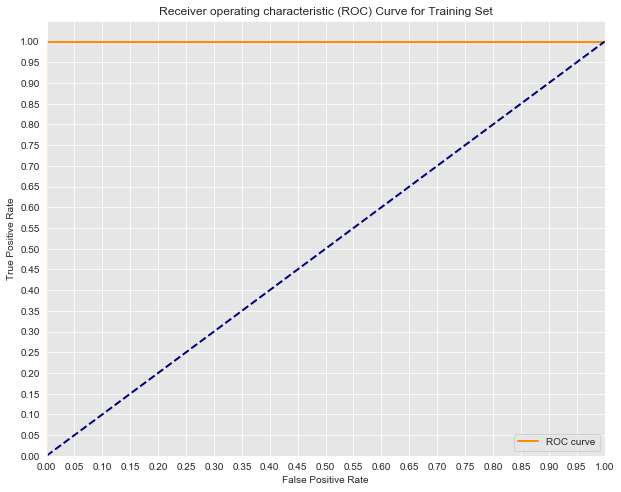

In [245]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})


plt.figure(figsize=(10, 8))
lw = 2
plt.plot(false_positive_test_rate_dt, true_positive_test_rate_dt, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(false_positive_test_rate_dt, true_positive_test_rate_dt)))
plt.show()

Conclusion

The model perfoms well on the test set.  Classifying revenue when there is no revenue will lead to models that are built upon false revenue making assumtions and 
classifying no revenue when there is revenue will lead to models that are missing revenue making assumtions.  
All of the models have good precision and recall, and therefore, are efficient in classifying whether revenue occured.  The 
models have good accuracy and f1 scores.  The models ROC curves all indicate that the true positive rate is larger than the 
false positive rate.  The Decision Tree model has the largest true positive rate.  The feature that is the most likely positive predictor for revenue is PageValue, the average amount 
of times a page leads to revenue.  